In [16]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
import warnings

warnings.filterwarnings("ignore")

In [18]:
no_tumor_dir = '/content/No '
yes_tumor_dir = '/content/Yes'

In [19]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)
    return images

In [20]:
no_tumor_images = load_images_from_folder(no_tumor_dir)
yes_tumor_images = load_images_from_folder(yes_tumor_dir)

In [21]:
no_tumor_labels = [0] * len(no_tumor_images)
yes_tumor_labels = [1] * len(yes_tumor_images)

In [22]:
X = np.array(no_tumor_images + yes_tumor_images)
y = np.array(no_tumor_labels + yes_tumor_labels)

In [23]:
print("Initial shape or dimensions of X", str(X.shape))

print ("Number of samples in our data: " + str(len(X)))
print ("Number of labels in our data: " + str(len(y)))


print("\n")
print ("Dimensions of images:" + str(X[0].shape))

Initial shape or dimensions of X (253, 128, 128, 3)
Number of samples in our data: 253
Number of labels in our data: 253


Dimensions of images:(128, 128, 3)


<Figure size 640x480 with 0 Axes>

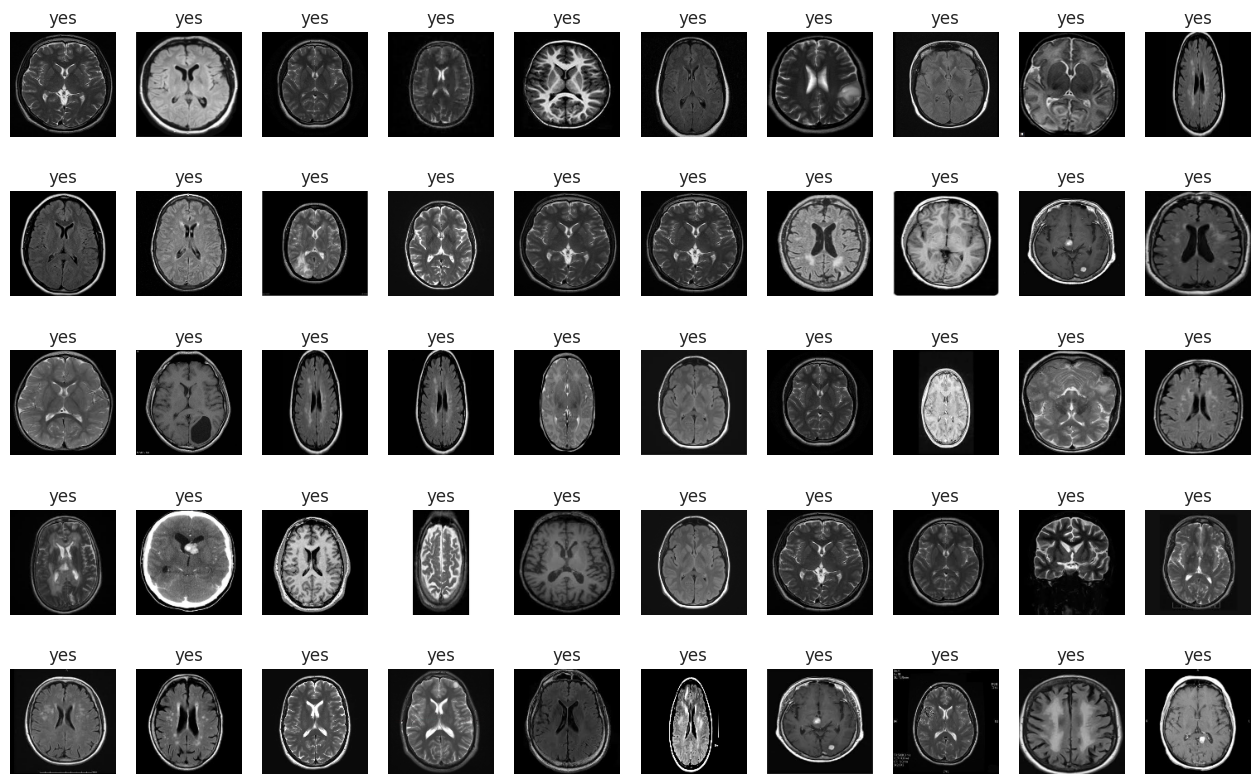

In [24]:
import matplotlib.pyplot as plt

figure = plt.figure()
plt.figure(figsize=(16,10))

num_of_images = 50

classes = ["yes", "no"]

for index in range(1, num_of_images + 1):
    class_names = classes[y[index]]
    plt.subplot(5, 10, index).set_title(f'{class_names}')
    plt.axis('off')
    plt.imshow(X[index], cmap='gray_r')

In [25]:
X = X.astype('float32')

In [26]:
img_rows = X[0].shape[0]
img_cols = X[0].shape[1]
input_shape = (img_rows, img_cols, 3)

X /= 255.0
y = to_categorical(y, num_classes=2)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [28]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

In [29]:
L2 = 0.001

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer = regularizers.l2(L2),
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_regularizer = regularizers.l2(L2)))
model.add(Dense(2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      31,490,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,509,826 (120.20 MB)

 Trainable params: 31,509,826 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

None


In [32]:
history = model.fit(X_train, y_train, batch_size = 8,
                              epochs = 25,
                              validation_data = (X_test, y_test),
                              verbose = 1,)

Epoch 1/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7824 - loss: 0.8336 - val_accuracy: 0.5098 - val_loss: 1.0806
Epoch 2/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7101 - loss: 0.8246 - val_accuracy: 0.7059 - val_loss: 0.8159
Epoch 3/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8262 - loss: 0.7324 - val_accuracy: 0.8235 - val_loss: 0.7123
Epoch 4/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7979 - loss: 0.6980 - val_accuracy: 0.8039 - val_loss: 0.7602
Epoch 5/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8349 - loss: 0.6667 - val_accuracy: 0.5098 - val_loss: 1.2991
Epoch 6/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8394 - loss: 0.6894 - val_accuracy: 0.8039 - val_loss: 0.6753
Epoch 7/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8287 - loss: 0.6133 - val_accuracy: 0.8431 - val_loss: 0.6564
Epoch 8/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9084 - loss: 0.5246 - val_accuracy: 0.8431 - val_loss:

In [33]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 394ms/step


In [34]:
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.85      0.90      0.88        31

    accuracy                           0.84        51
   macro avg       0.84      0.83      0.83        51
weighted avg       0.84      0.84      0.84        51



<Axes: >

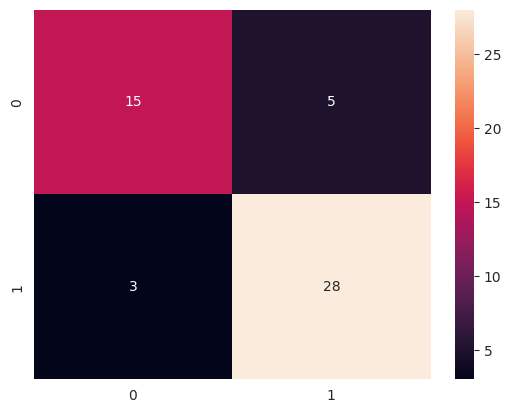

In [35]:
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True)